# Abstract

This report furhters the study of use of Python for scientific work. The problem of a wired soldered to the center of a metal plate with one side grounded is modeled and visualised using various tools offered by libraries such as $matplotlib$. Visualisation of the current and potential across the plate offers a better understanding of the resistive nature of the plate.

# Introduction

# insert image 

The problem is as follows: A $1cm$ by $1cm$ metal plate grounded at one end has a wire of  radius $0.35$ cm soldered to its center. The potential of this wire is $1 V$. The potential and currents are to be modeled. This is done by using the following relations 

# edit div

\begin{align}
\vec{j} &= \sigma\vec{E}\\
\vec{E} &=-\nabla\phi\\
\div\vec{j} &= -\frac{\partial \rho}{\partial t}
\end{align}
which results in
\begin{equation}
\nabla^2\phi=0
\end{equation}
for DC currents. For the present problem, this turns into the two dimensional laplace equation. To model the currents, the plate is broken up into $Nx$ and $Ny$ segments and the potential at each of the points randomly inititalised except at the center where it is $1V$. The potential at each point is then replaced by the average  of the potentials at each of the 4 points surrounding it over $Niter$ iterations. This results in a a plot of the desired potential. Boundary conditions include the fact that one of the sides of the plate is grounded and the others must see no variation of potential in the normal direction. 

# Method and results

We make the necessary imports from various libraries and define the size of the images to be displayed by matplotlib. We also define some helper functions.

In [2]:
from __future__ import division

% matplotlib inline 

import sys
import numpy as np
from matplotlib import pyplot as plt, cm
import matplotlib
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import signal
size= (10,8)

In [3]:
# define the necessary functions
def errorfit(x,c):
    return np.exp(c[0])*np.exp(x*c[1])

Here we declare the necessary defaults and also make the addition of command line argunments.

In [4]:
# necessary constants

Nx = 40
Ny = 40
radius = 0.35
Niter = 1500

#if len(sys.argv)>1:
#    Nx= float(sys.argv[1])
#    Ny= float(sys.argv[2])
#    radius= float(sys.argv[3])
#    Niter= float(sys.argv[4])

The following code only imposes a coordinate system on the matrix phi, mapping the point $phi[0][0]$ to $(x,y)= (0.5,0.5)$. Further due to swap made in $meshgrid$ function the rows map to the y direction and the columns to the x direction.

In [5]:
# making the plate matrix
phi= np.zeros((Ny,Nx))
x= np.linspace(0.5, -0.5, Nx)
y= np.linspace(0.5, -0.5, Ny)
X,Y= np.meshgrid(y,x)
# phi(0,0) maps to x,y = 0.5,0.5
# rows in y direction, columns in x


A filled in contour plot is plotted alongside a scatter plot that sutably represent the potential.

/home/milind/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'N'
  s)


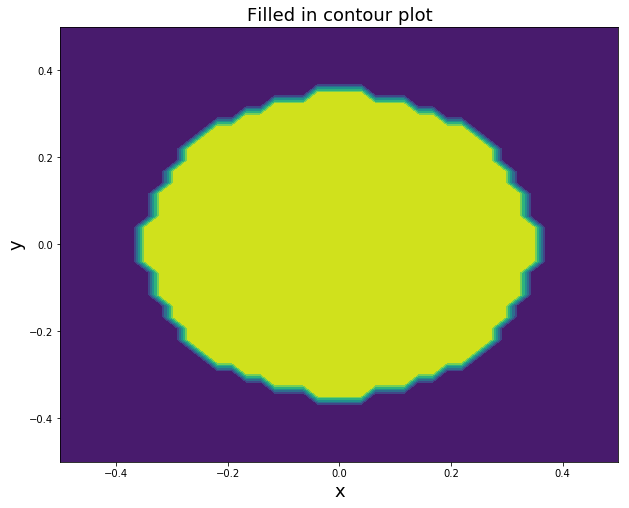

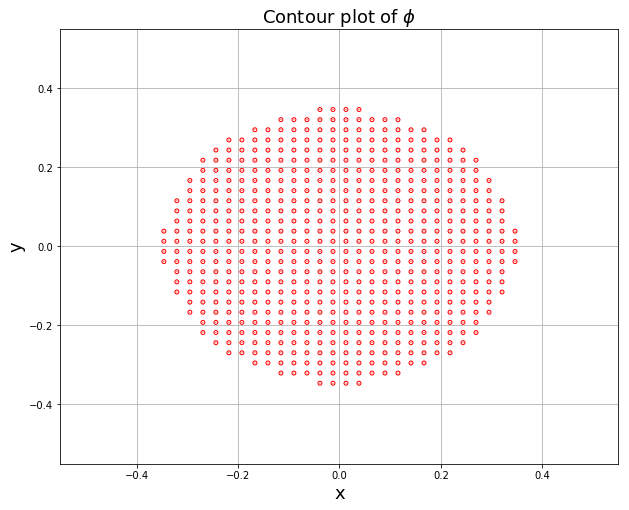

In [6]:
ii= np.where(X*X + Y*Y <= radius*radius)
phi[ii]= 1
plt.figure(figsize=size)
plt.contourf(X,Y,phi,N=1)
plt.title("Filled in contour plot",fontsize=18)
plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.show()
plt.close()
fig1= plt.figure(1, figsize=size)
axes1 = fig1.add_subplot(1,1,1)
axes1.set_xlabel("x", fontsize=18)
axes1.set_ylabel("y",fontsize=18)
axes1.grid(True)
axes1.set_title("Contour plot of $\phi$",fontsize=18)
graph= axes1.scatter(X,Y,phi,  linewidth=4, color = "red")


The following code makes a scatter plot of the computed potential. As expected the potential declines as we progress towards $y = -0.5$ which corresponds to $phi[-1,:]$. Also, the convolve2d method is used as it is an easier approach to replacing every center element with the average of the values surrounding it (which basically is 2d convolution). 

/home/milind/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'N'
  s)


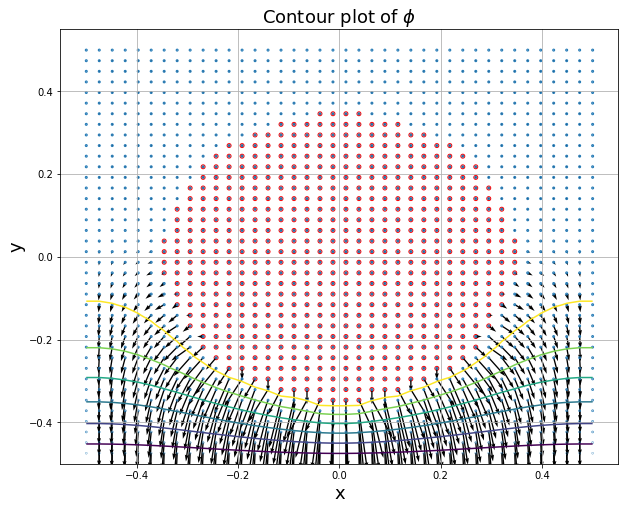

In [16]:
error=[]
# the iterations

for k in range(0,1500):
    A=np.array([[0,0.25,0],[0.25,0,0.25],[0,0.25,0]])
    newphi=signal.convolve2d(A,phi)
    newphi=newphi[1:-1,1:-1]
    newphi[:,0]=newphi[:,1]
    newphi[:,-1]=newphi[:,-2]
    newphi[0,:]=newphi[1,:]
    newphi[-1,:]=0
    newphi[ii]=1
    error.append(abs(phi-newphi).max())
    phi=newphi.copy()
axes1.contour(X,Y,phi,N=2)
axes1.scatter(X,Y,phi,linewidth=2)
fig1

Our approach produces an error which decays as 
\begin{equation}
error= Ae^{Bx}
\end{equation}
This is confirmed by the linear semilog plot of error.

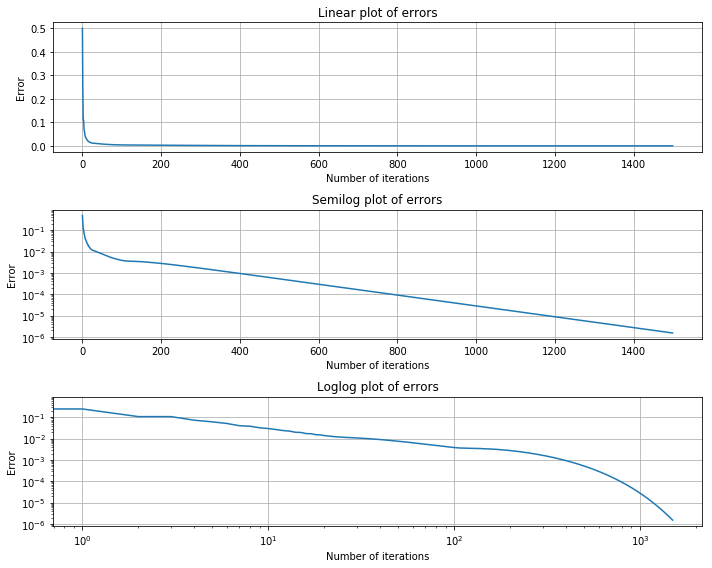

In [8]:
fig2= plt.figure(2,figsize=size)
axes20= fig2.add_subplot(311)
axes20.set_title("Linear plot of errors")
axes20.set_xlabel("Number of iterations")
axes20.set_ylabel("Error")
axes20.grid(True)
axes20.plot(error,label="errors")

axes21= fig2.add_subplot(312)
axes21.set_title("Semilog plot of errors")
axes21.set_xlabel("Number of iterations")
axes21.set_ylabel("Error")
axes21.grid(True)
axes21.semilogy(error,label="errors")

axes22= fig2.add_subplot(313)
axes22.set_title("Loglog plot of errors")
axes22.set_xlabel("Number of iterations")
axes22.set_ylabel("Error")
axes22.grid(True)
graph=axes22.loglog(error,label="errors")


plt.tight_layout()



The least squares approach is used to fit the error using the knowledge that it is exponential. However it is evident that this is a poor fit for lower values of number of iterations. This can be best observed from the loglog plot.

/home/milind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/home/milind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


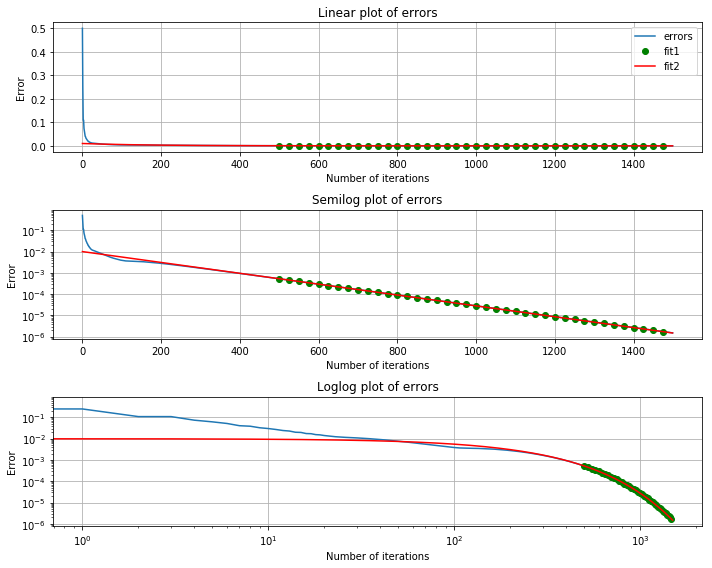

In [9]:
# Fitting using least squares
b1=np.log(np.array(error[500:]))
A1=np.zeros((len(b1),2))
A1[:,0]=1
A1[:,1]=range(500,Niter)
c1= np.linalg.lstsq(A1,b1)[0]
fit1= errorfit(A1[:,1],c1)

b2=np.log(np.array(error))
A2=np.zeros((len(b2),2))
A2[:,0]=1
A2[:,1]=range(0,Niter)
c2= np.linalg.lstsq(A2,b2)[0]
fit2= errorfit(A2[:,1],c2)


graph= axes20.plot(A1[:,1][::25],fit1[::25],"go",label="fit1")
graph= axes20.plot(A2[:,1],fit2,"r",label="fit2")


graph= axes21.semilogy(A1[:,1][::25],fit1[::25],"go",label="fit1")
graph= axes21.semilogy(A2[:,1],fit2,"r",label="fit2")

graph= axes22.loglog(A1[:,1][::25],fit1[::25],"go",label="fit1")
graph= axes22.loglog(A2[:,1],fit2,"r",label="fit2")
axes20.legend()
fig2


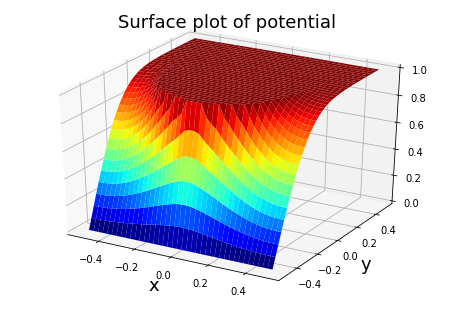

In [10]:
fig4=plt.figure(4) # open a new figure
ax=p3.Axes3D(fig4) # Axes3D is the means to do a surface plot
plt.title("Surface plot of potential", fontsize=18)
plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.grid(True)
surf = ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap= cm.jet,linewidth=0,alpha=1)


The following code produces a vector plot of currents.

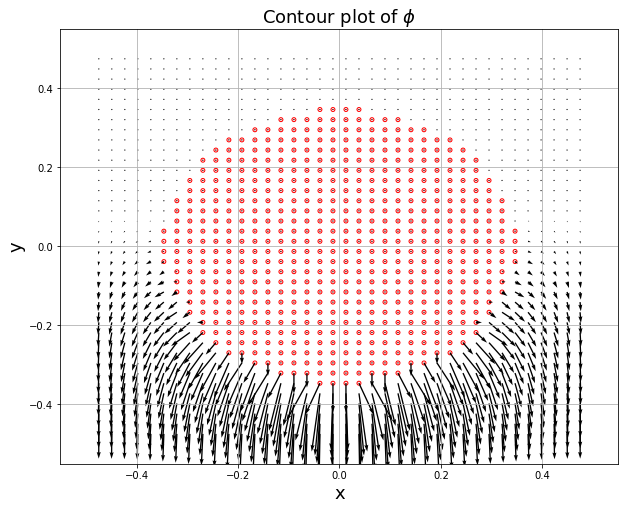

In [11]:
a1= np.array([[-1,0,1]])
a2= np.array([[-1],[0],[1]])
jx= -0.1*signal.convolve2d(a1,phi)[:,1:-1]

jy= -0.1*signal.convolve2d(a2,phi)[1:-1,:]
#jy=np.zeros((25,25))


axes1.quiver(X[1:-1,1:-1],Y[1:-1,1:-1],jx[1:-1,1:-1],jy[1:-1,1:-1], linewidth=0.1)

fig1

The following code finds the 

In [12]:
j=(jx*jx) + (jy*jy)

In [13]:
T= np.zeros((Ny,Nx))
T[ii]= 300
error=[]
# the iterations

for k in range(0,4000):
    A=np.array([[0,0.25,0],[0.25,0,0.25],[0,0.25,0]])
    newphi=signal.convolve2d(A,T)
    newphi=newphi[1:-1,1:-1]
    newphi=newphi+j
    newphi[:,0]=newphi[:,1]
    newphi[:,-1]=newphi[:,-2]
    newphi[0,:]=newphi[1,:]
    newphi[-1,:]=300
    newphi[ii]=300
    T=newphi.copy()




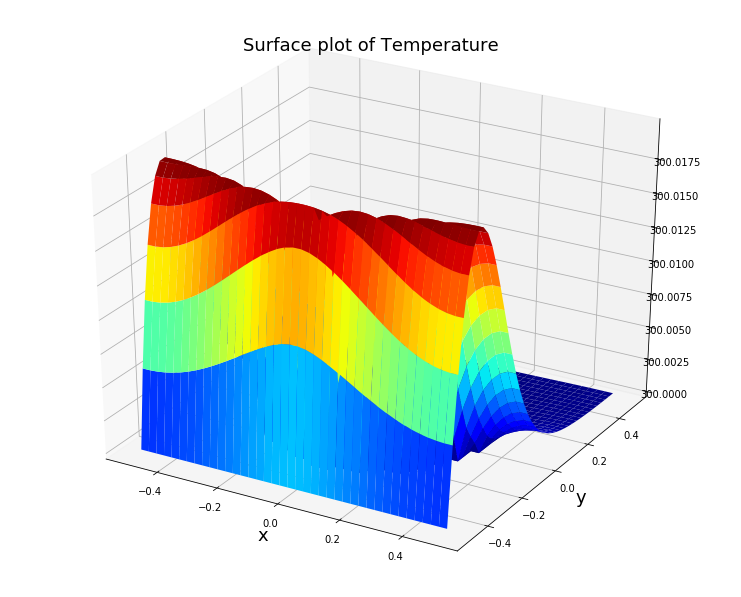

In [14]:
fig5=plt.figure(5,figsize=size) # open a new figure
ax=p3.Axes3D(fig5) # Axes3D is the means to do a surface plot
plt.title("Surface plot of Temperature", fontsize=18)
plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.grid(True)
surf = ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap= cm.jet,linewidth=0,alpha=1)

# Conclusion

The model effectively displays a rapid gradient in potential from the wire to the grounded side. Further, the vector currents also show that maximum current occurs between the wire and ground and in that direction. This also is the area where maximum heat is generated by the current. This method is perhaps not the best way of solving the laplace equation. Perhaps the best method to test this is by increasing Nx and Ny. The laptop on which this code was tested performed well with $Nx = Ny = 50$ but crawled with Nx being increased to 100. Thus this calls for a better approach.

In all, this report pursues the aggresive use of plotting tools offered by scientific python to model, visualise and study physical phenomenon. The effective use of contour, surface plots and the use of the least squares method to estimate and fit errors attests to this.

In [15]:
ax.plot_surface?